In [6]:
import re
from typing import List

import matplotlib.pyplot as plt
import numpy as np
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

In [9]:
# Open corpus.txt and append sentences to list 
def extract_corpus():
    corpus = []
    with open('corpus.txt') as file:
        for line in file:
            corpus.append(line)
    return corpus

#simple tokenizer - lowercase + keep letters
def tokenize(text: str):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", " ", text)
    return [t for t in text.split() if t]


    # Train a Skip-gramm model
def train_model(sentences, vector_size=50):
    model = Word2Vec(
        sentences=sentences,
        vector_size=vector_size, #vector dimension
        window=3,
        min_count=1,
        sg=1,          # 1 = skip-gram; 0 = CBOW
        negative=10,
        epochs=300, 
        seed=42,      # keep fixed seed for replicability
        workers=1,    
    )
    return model


def visualize(words, model):
    # Take a few words for visualization
    vectors = np.array([model.wv[w] for w in words])

    # Reduce to 2D for plotting (PCA is fine for a simple demo)
    pca = PCA(n_components=2, random_state=42)
    coords = pca.fit_transform(vectors)

    # Print a couple of similarity examples
    def sim(a: str, b: str):
        return float(model.wv.similarity(a, b))

    print("Cosine similarities (higher = closer in embedding space):")
    print(f"  espresso ~ coffee  : {sim('espresso', 'coffee'):.3f}")
    print(f"  espresso ~ barista : {sim('espresso', 'barista'):.3f}")
    print(f"  espresso ~ dog     : {sim('espresso', 'dog'):.3f}")
    print(f"  dog ~ cat          : {sim('dog', 'cat'):.3f}")
    print(f"  dog ~ cafe         : {sim('dog', 'cafe'):.3f}")

    # Plot
    plt.figure(figsize=(8, 6))
    plt.scatter(coords[:, 0], coords[:, 1])

    for w, (x, y) in zip(words, coords):
        plt.annotate(w, (x, y), xytext=(5, 2), textcoords="offset points")

    plt.title("Toy word-embedding space (2D PCA projection)")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.axhline(0)
    plt.axvline(0)
    plt.tight_layout()
    plt.savefig("plot_toy_embeddings.png") #image will be saved in the WD

    plt.show()

Cosine similarities (higher = closer in embedding space):
  espresso ~ coffee  : 0.812
  espresso ~ barista : 0.669
  espresso ~ dog     : 0.560
  dog ~ cat          : 0.948
  dog ~ cafe         : 0.455


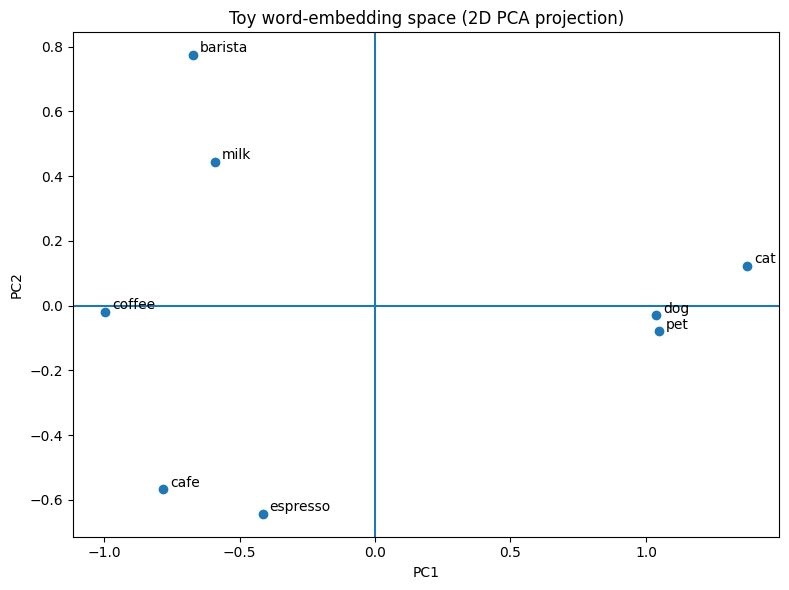

In [10]:
def main() -> None:
    corpus = extract_corpus() #get corpus
    sentences = [tokenize(s) for s in corpus] #Get preprocessed tokenized sentences
    model = train_model(sentences) #call trainer function
    
    #visualize target words
    words = ["espresso", "coffee", "cafe", "barista", "dog", "cat", "pet", "milk"]
    visualize(words, model) #call the function for visiualization 

if __name__ == "__main__":
    main()